In [1]:
# Import all libraries we need
# To install, use one of the following commands
# conda install -c conda-forge <library name>
# pip install <library name>
# If installation is not possible, consult the library documentation on how to proceed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Read all data into Dataframe
data = []
f = open('housing.data')
lines = f.readlines()
for l in lines:
    l = ' '.join(l.split())
    data.append([float(n) for n in l.strip('\n').split(' ')])
    
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Feature names. See the housing.names file for description of them
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Split the features and values from each other
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Split data into train and test sets
# Use seed for reproducability
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=99)

In [ ]:
# Normalize the x values
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
print("Values after being normalized")
print(x_train)

Values after being normalized
           0         1         2         3         4         5         6   \
171  0.004268  0.000000  0.036118  0.000000  0.001116  0.010846  0.179483   
206  0.000473  0.000000  0.021796  0.000000  0.001006  0.013020  0.108056   
3    0.000071  0.000000  0.004785  0.000000  0.001005  0.015360  0.100527   
152  0.002096  0.000000  0.036435  0.001861  0.001621  0.009326  0.163752   
195  0.000029  0.167471  0.000963  0.000000  0.000883  0.016485  0.066988   
..        ...       ...       ...       ...       ...       ...       ...   
201  0.000065  0.154592  0.003804  0.000000  0.000778  0.011547  0.071955   
168  0.004505  0.000000  0.038348  0.000000  0.001185  0.012376  0.188213   
185  0.000138  0.000000  0.005608  0.000000  0.001113  0.014028  0.156854   
35   0.000131  0.000000  0.012151  0.000000  0.001017  0.012096  0.139041   
129  0.001471  0.000000  0.036545  0.000000  0.001042  0.009411  0.158100   

           7         8         9         10  

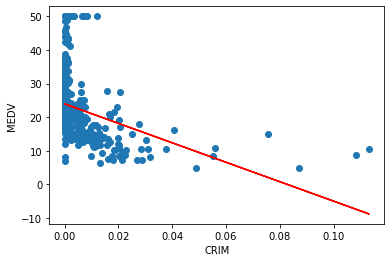

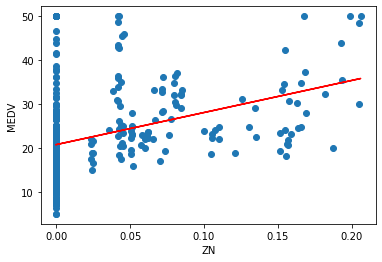

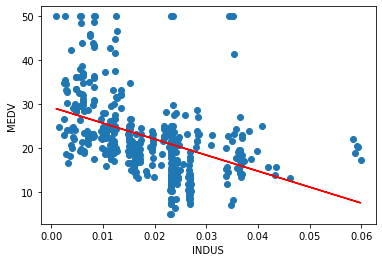

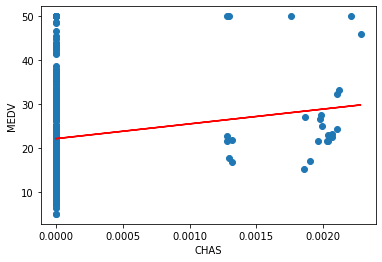

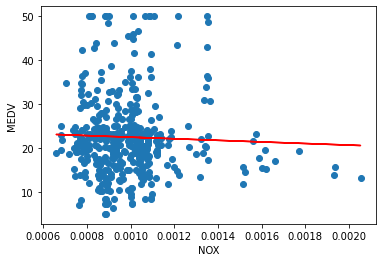

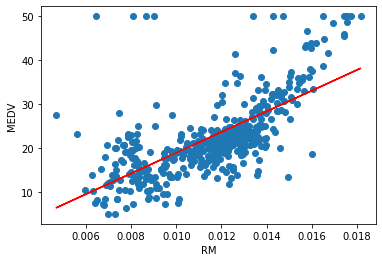

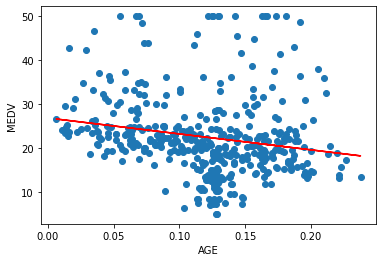

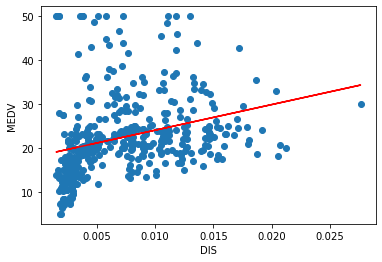

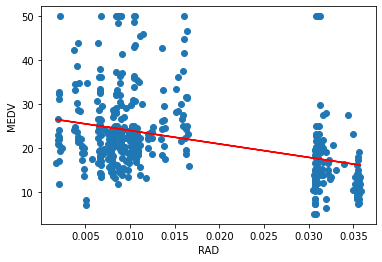

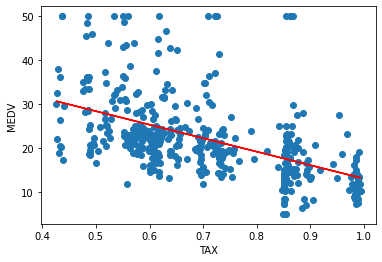

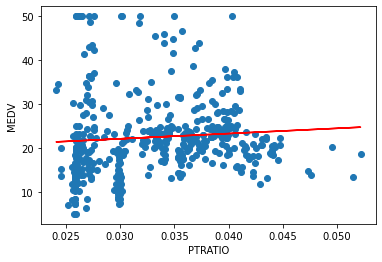

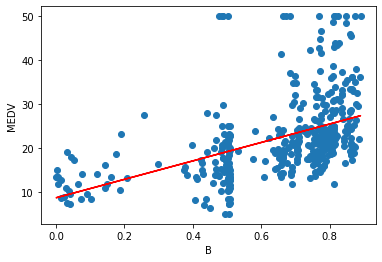

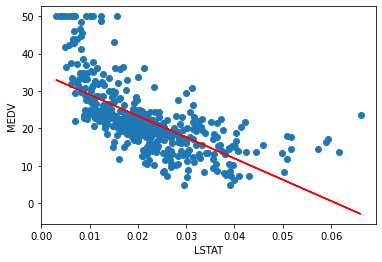

In [22]:
# Plot the normalized values
# Each plot has a fitted line that shows the general trend
# Some have significantly less correlation but all will remain in use for the network
for i in range(len(x_train.columns)):
    plt.scatter(x_train[i], y_train)
    m, b = np.polyfit(x_train[i], y_train, 1)
    plt.xlabel(df.columns[i])
    plt.ylabel(df.columns[-1])
    plt.plot(x_train[i], m*x_train[i]+b, 'r')
    plt.show()

In [7]:
# Setup the model. The model uses relu activation as it produced the best results
model = Sequential()
model.add(Dense(13, input_dim=13))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

In [8]:
# Compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 0s 1ms/step - loss: 585.9692
Epoch 2/250
14/14 [==============================] - 0s 923us/step - loss: 570.1019
Epoch 3/250
14/14 [==============================] - 0s 991us/step - loss: 544.7234
Epoch 4/250
14/14 [==============================] - 0s 910us/step - loss: 499.0136
Epoch 5/250
14/14 [==============================] - 0s 923us/step - loss: 415.0478
Epoch 6/250
14/14 [==============================] - 0s 923us/step - loss: 270.3062
Epoch 7/250
14/14 [==============================] - 0s 998us/step - loss: 116.5545
Epoch 8/250
14/14 [==============================] - 0s 997us/step - loss: 86.3140
Epoch 9/250
14/14 [==============================] - 0s 1ms/step - loss: 80.8034
Epoch 10/250
14/14 [==============================] - 0s 1ms/step - loss: 78.7290
Epoch 11/250
14/14 [==============================] - 0s 1ms/step - loss: 76.2382
Epoch 12/250
14/14 [==============================] - 0s 1ms/step - loss: 75.8372
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 50.0268
Epoch 100/250
14/14 [==============================] - 0s 999us/step - loss: 48.3726
Epoch 101/250
14/14 [==============================] - 0s 996us/step - loss: 48.4650
Epoch 102/250
14/14 [==============================] - 0s 923us/step - loss: 48.1864
Epoch 103/250
14/14 [==============================] - 0s 923us/step - loss: 47.9332
Epoch 104/250
14/14 [==============================] - 0s 848us/step - loss: 48.0731
Epoch 105/250
14/14 [==============================] - 0s 923us/step - loss: 47.2798
Epoch 106/250
14/14 [==============================] - 0s 923us/step - loss: 47.2104
Epoch 107/250
14/14 [==============================] - 0s 1ms/step - loss: 47.5356
Epoch 108/250
14/14 [==============================] - 0s 923us/step - loss: 46.6937
Epoch 109/250
14/14 [==============================] - 0s 923us/step - loss: 46.5769
Epoch 110/250
14/14 [==============================] - 0s 923us/step - loss: 45.889

14/14 [==============================] - 0s 848us/step - loss: 20.8817
Epoch 196/250
14/14 [==============================] - 0s 921us/step - loss: 20.8596
Epoch 197/250
14/14 [==============================] - 0s 844us/step - loss: 20.7549
Epoch 198/250
14/14 [==============================] - 0s 846us/step - loss: 20.1314
Epoch 199/250
14/14 [==============================] - 0s 848us/step - loss: 21.7002
Epoch 200/250
14/14 [==============================] - 0s 921us/step - loss: 21.9722
Epoch 201/250
14/14 [==============================] - 0s 925us/step - loss: 21.8802
Epoch 202/250
14/14 [==============================] - 0s 925us/step - loss: 20.5258
Epoch 203/250
14/14 [==============================] - 0s 846us/step - loss: 20.4351
Epoch 204/250
14/14 [==============================] - 0s 848us/step - loss: 22.8798
Epoch 205/250
14/14 [==============================] - 0s 848us/step - loss: 20.6905
Epoch 206/250
14/14 [==============================] - 0s 923us/step - loss: 20

In [9]:
# Save the model. This has been commented out and the model is provided along with this code.
# This is because the whole process is not deterministic and the results should perfectly mirror the report
#model.save('housing_model.model')

In [10]:
# Load the model and print the summary
pred_model = keras.models.load_model('housing_model.model')
print(pred_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 16)                224       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,551
Trainable params: 2,551
Non-trainabl

In [11]:
# Use the model to predict
y_pred = pred_model.predict(x_test)

# Computer the r2 score and print it
r2 = r2_score(y_test, y_pred)
print(r2)

0.7618202185708729


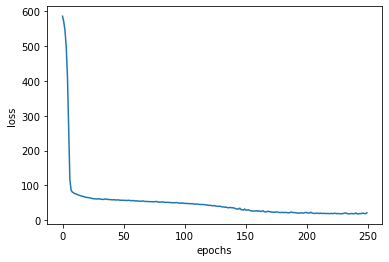

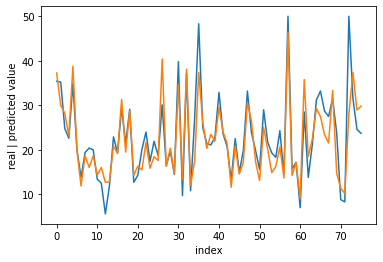

In [26]:
# Plot the loss over time(epochs)
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

# Plot real value and the prediction
plt.plot(y_test.array)
plt.plot(y_pred)
plt.ylabel('real | predicted value')
plt.xlabel('index')
plt.show()